<a id="top"></a>

# Handwritten Digit Recognizer
 ### Problem Statement and Data Description
 
 <p> Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.<p>
<h4>Content</h4>
<ol>
<li>Introduction</li>
<li>Data prepration</li>
<li>CNN</li>
<li>Evaluation</li>
<li>Saving the model</li></ol>

In [1]:
# importing essential libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# loading the dataset

train=pd.read_csv('../data/train.csv')

In [3]:
train.shape

(42000, 785)

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# loading the test dataset

test=pd.read_csv('../data/test.csv')

In [6]:
test.shape

(28000, 784)

In [7]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data prepration

In [8]:
X_train=train.iloc[:,1:].values.astype('float32')
Y_train=train.iloc[:,0].values.astype('int32')
X_test=test.values.astype('float32')

In [9]:
X_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [10]:
Y_train

array([1, 0, 1, ..., 7, 6, 9])

In [11]:
# Normalize the data

X_train = X_train / 255.0
test = test / 255.0

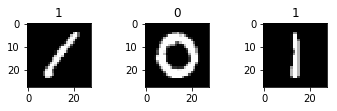

In [12]:
X_train = X_train.reshape(-1, 28, 28)

for i in range(0, 3):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(Y_train[i]);

In [13]:
X_train.shape

(42000, 28, 28)

In [14]:
#expand 1 more dimention as 1 for colour channel gray

X_train = X_train.reshape(-1, 28, 28,1)
X_train.shape

(42000, 28, 28, 1)

In [15]:
X_test = X_test.reshape(-1, 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

In [16]:
from keras.utils.np_utils import to_categorical
Y_train= to_categorical(Y_train, num_classes = 10)
Y_train.shape

Using TensorFlow backend.


(42000, 10)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_val,y_train,y_val = train_test_split(X_train, Y_train, test_size=.2, random_state=42)

## CNN

In [19]:
# importing the Keras libraries and packages

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [20]:
# Initialising the CNN

clf = Sequential()

In [21]:
# convolution
clf.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
clf.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
# pooling
clf.add(MaxPool2D(pool_size=(2,2))
clf.add(Dropout(0.25))


# convolution
clf.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
clf.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# pooling
clf.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
clf.add(Dropout(0.25))


# Flattening
clf.add(Flatten())


# full connection
clf.add(Dense(256, activation = "relu"))
clf.add(Dropout(0.5))
clf.add(Dense(10, activation = "softmax"))

In [22]:
# Define the optimizer

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [23]:
# Compile the model

clf.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [24]:
# fitting the CNN to the images

from keras.preprocessing import image

datagen= image.ImageDataGenerator()

batches = datagen.flow(x_train, y_train, batch_size=32)
val_batches=datagen.flow(x_val, y_val, batch_size=32)

hmod = clf.fit_generator(batches, epochs=1, validation_data=val_batches, 
                    steps_per_epoch=X_train.shape[0] // 32,validation_steps=32)

Epoch 1/1
1312/1312 [==============================] - 663s - loss: 0.1916 - acc: 0.9410 - val_loss: 0.0522 - val_acc: 0.9814


## Evaluation

In [25]:
# Predict the values from the validation dataset

y_pred = clf.predict(x_val)

In [26]:
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 

# Convert validation observations to one hot vectors
y_true = np.argmax(y_val,axis = 1) 

# compute the confusion matrix
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

In [27]:
confusion_mtx

array([[813,   0,   0,   0,   0,   1,   2,   0,   0,   0],
       [  0, 906,   1,   0,   1,   0,   0,   0,   1,   0],
       [  0,   6, 826,   4,   4,   0,   0,   3,   3,   0],
       [  0,   0,   0, 922,   0,   7,   0,   3,   3,   2],
       [  1,   0,   0,   0, 829,   0,   3,   0,   0,   6],
       [  0,   0,   0,   1,   0, 699,   2,   0,   0,   0],
       [  2,   1,   0,   0,   0,   9, 771,   0,   2,   0],
       [  0,   2,   9,   2,   1,   1,   0, 874,   2,   2],
       [  2,   3,   4,   6,   5,  11,   1,   1, 796,   6],
       [  3,   2,   1,   4,   5,   6,   0,   4,   4, 809]], dtype=int64)

## Saving the model

In [28]:
from keras.models import load_model

In [29]:
clf.save('my_model.h5')

<hr>

<b><a href='#top'>Return to top</a></b>

<b>Created by:</b><br><i><b>Anubhav Shukla</b></i>

<hr>